<a href="https://colab.research.google.com/github/AnannyaMathewKJ/CodeAlpha_Car_Price_Prediction_with_Machine_Learning/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
import kagglehub

path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")

print("Path to dataset files:", path)

100%|██████████| 3.76k/3.76k [00:00<00:00, 6.45MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1


In [ ]:
import os
os.listdir('/root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1')

['car data.csv']

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


<Axes: >

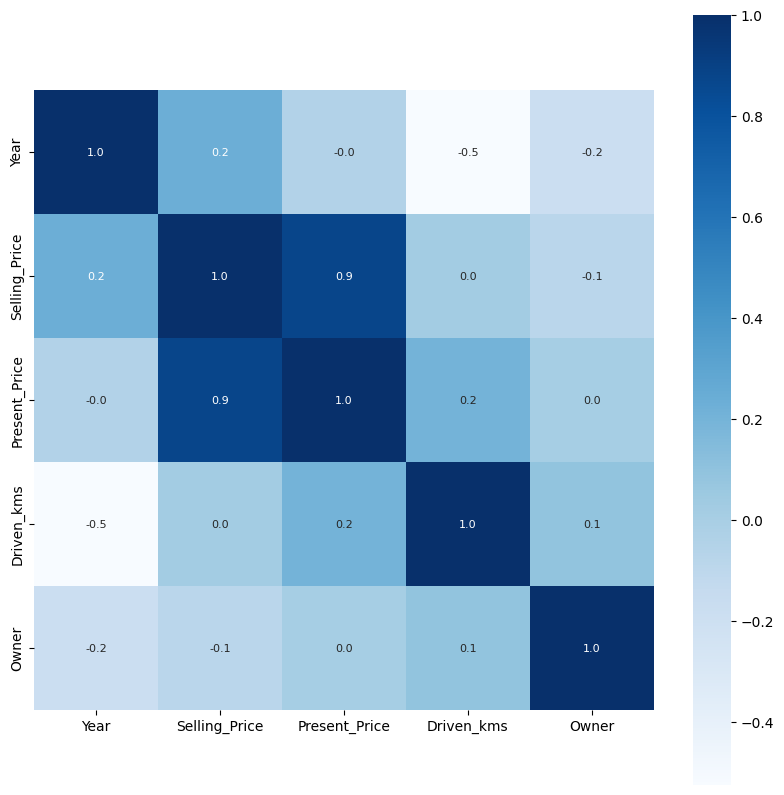

In [ ]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df = df.drop(['Car_Name'], axis=1)

In [ ]:
X = df.drop(['Selling_Price'], axis=1)
Y = df['Selling_Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


In [ ]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 0.2503173   0.75997806  0.21623418  3.9390826   1.1541655  19.993944
 22.999887    6.736078    0.3762898   3.1031988   4.40097     5.6514454
  4.4776874   2.0222914   1.1557235   0.7734609  11.445873    0.18589859
  9.706436    5.244144    2.8991482   3.4913223  19.745722    2.9371037
  0.44958884  1.0546907   2.6406176   0.2994559  14.513655    1.1285414
  0.25033277  7.4415245   7.7517676   2.8586059   0.17026502  3.336041
  4.352436    5.228699    0.3498955   7.2473087   0.90141356  5.7552342
  2.9983795   9.256465    2.6968954  14.256207    2.3687906   0.35307685
  0.4944485   6.597113    0.6023599   3.246369    0.26762736 20.74525
  3.0754437   0.51632196 34.994694   12.904278    0.54975116  3.2512946
 10.242937    0.8869335   0.6121773   7.9021807   3.6035058   0.54428804
  0.25047076  5.2827525   3.0012188   0.16210839  3.9019332   4.8605356
  1.1492645   0.4010647   1.1138476   6.011249    7.489454    0.49161488
  0.34732023  0.30368024  7.2483726   1.1287843   5.987269    0.

In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9999957873250006
Mean Absolute Error: 0.007660214216758816


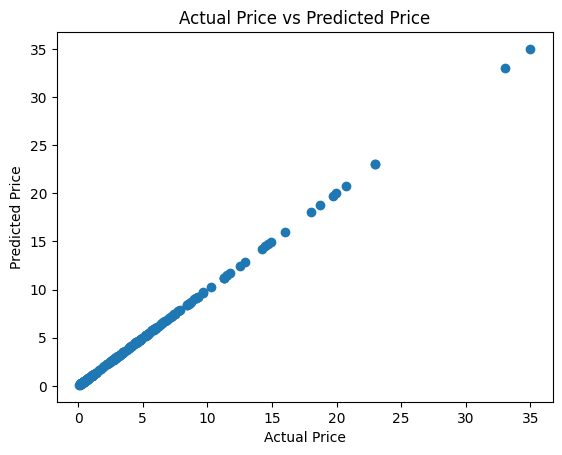

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9576991407650957
Mean Absolute Error: 0.6222420885523811
